# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

Ans: 17 campaigns that occurred between May 2008 and November 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [91]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns




In [97]:
campaign_df = pd.read_csv('C:/Users/gmsam/OneDrive/Documents/UC Berkeley/Module_17/module_17_starter/data/bank-additional-full.csv', sep = ';')

In [98]:
campaign_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [57]:
# converting yes and no to 1 and 0
campaign_df['y'] = campaign_df['y'].map({'yes': 1, 'no': 0})

In [101]:
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

Business Objective: To predict whether or not a person will subscribe to a term deposit that would help target potential clients based on their characteristics and previous interaactions with the bank.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [59]:
#Create feature matrix X and target vector y
X = campaign_df.drop('y', axis = 1)
y = campaign_df['y']

In [60]:
#Define categorical and numerical features
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [61]:
#Creat a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(), categorical)
    ]
)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [63]:
# Count the occurrences of each class
class_counts = y_train.value_counts()

# Identify the majority class and its count
majority_class, majority_count = class_counts.idxmax(), class_counts.max()

# Calculate baseline accuracy
baseline_accuracy = majority_count / len(y)

print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.621054676119258


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [64]:
lr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter = 1000))
])

### Problem 9: Score the Model

What is the accuracy of your model?

In [65]:
train_pred = lr_model.fit(X_train, y_train).predict(X_train)
test_pred = lr_model.predict(X_test)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Train accuracy: {train_accuracy:.3f}, Test accuracy: {test_accuracy:.3f}")

Train accuracy: 0.912, Test accuracy: 0.912


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [116]:
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter = 1000),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
    }

In [117]:
results = []
for name, clf in classifiers.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    results.append({
        'Model': name, 
        'Train Time': train_time,
        'Train Accuracy': train_accuracy, 
        'Test Accuracy': test_accuracy
        })

results_df0 = pd.DataFrame(results)
results_df0

,Model,Train Time,Train Accuracy,Test Accuracy
0,KNN,0.060838,0.927266,0.901271
1,Logistic Regression,0.374878,0.911762,0.912357
2,Decision Tree,0.253198,1.000000,0.887594
3,SVM,13.987576,0.923312,0.912034


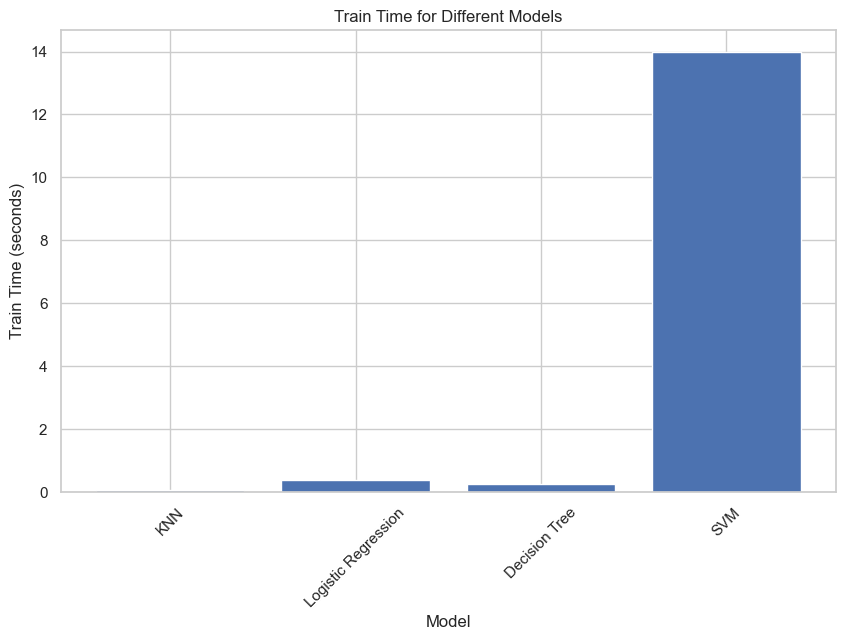

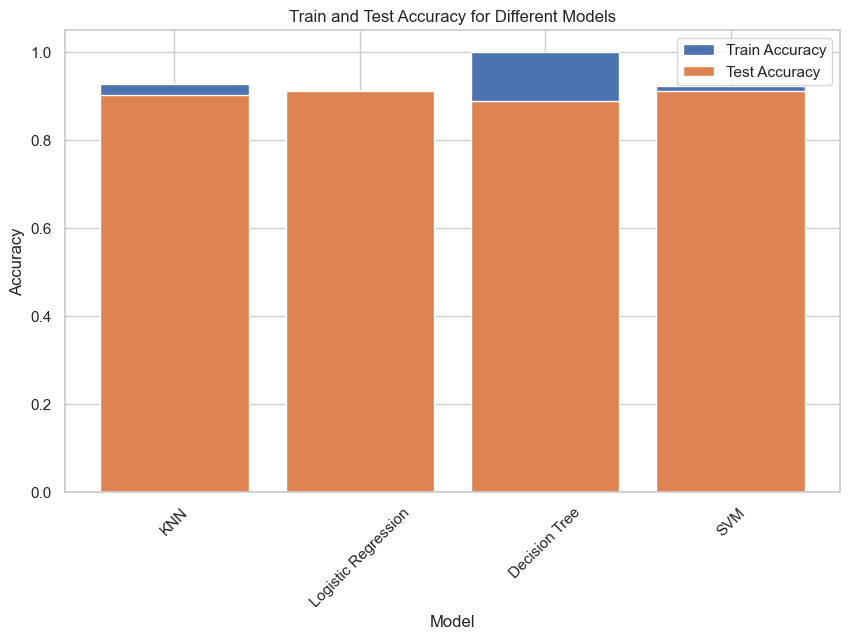

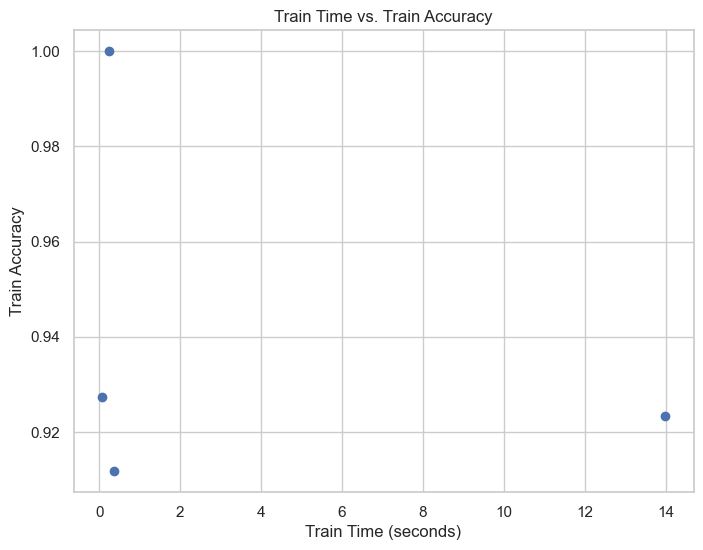

In [119]:
# 1. Bar plot for Train Time
plt.figure(figsize=(10, 6))
plt.bar(results_df0['Model'], results_df0['Train Time'])
plt.xlabel('Model')
plt.ylabel('Train Time (seconds)')
plt.title('Train Time for Different Models')
plt.xticks(rotation=45)
plt.show()

# 2. Bar plot for Train and Test Accuracy
plt.figure(figsize=(10, 6))
plt.bar(results_df0['Model'], results_df0['Train Accuracy'], label='Train Accuracy')
plt.bar(results_df0['Model'], results_df0['Test Accuracy'], label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for Different Models')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 3. Scatter plot for Train Time vs. Train Accuracy
plt.figure(figsize=(8, 6))
plt.scatter(results_df0['Train Time'], results_df0['Train Accuracy'])
plt.xlabel('Train Time (seconds)')
plt.ylabel('Train Accuracy')
plt.title('Train Time vs. Train Accuracy')
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
#Exploring the relationship between marital status and response
campaign_df1 = campaign_df.drop('marital', axis = 1)

In [77]:
X1 = campaign_df1.drop('y', axis = 1)
y1 = campaign_df1['y']

In [78]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3,random_state = 42)

In [80]:
categorical1 = ['job', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical1 = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [81]:
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical1),
        ('cat', OneHotEncoder(), categorical1)
    ]
)

In [83]:
results1 = []
for name, clf in classifiers.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor1),
        ('classifier', clf)
    ])
    start_time = time.time()
    pipeline.fit(X_train1, y_train1)
    train_time = time.time() - start_time
    
    train_pred1 = pipeline.predict(X_train1)
    test_pred1 = pipeline.predict(X_test1)
    train_accuracy = accuracy_score(y_train1, train_pred1)
    test_accuracy = accuracy_score(y_test1, test_pred1)

    results1.append({
        'Model': name, 
        'Train Time': train_time,
        'Train Accuracy': train_accuracy, 
        'Test Accuracy': test_accuracy
        })

results_df1 = pd.DataFrame(results)
results_df1

,Model,Train Time,Train Accuracy,Test Accuracy
0,KNN,0.083632,0.927266,0.901271
1,Logistic Regression,0.421633,0.911762,0.912357
2,Decision Tree,0.262804,1.000000,0.888322
3,SVM,14.321909,0.923312,0.912034


In [84]:
# Feature Engineering
# Example: Binning age into categories
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65+']
campaign_df1['age_group'] = pd.cut(campaign_df1['age'], bins=bins, labels=labels)

In [85]:
# Define categorical and numerical features
categorical2 = ['job', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'age_group']
numerical2 = ['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [86]:
# Preprocessing
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical2),
        ('cat', OneHotEncoder(), categorical2)
    ]
)

In [87]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
classifiers = {
    'KNN': (KNeighborsClassifier(), {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    }),
    'Logistic Regression': (LogisticRegression(max_iter=1000), {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__solver': ['liblinear', 'saga']
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'classifier__max_depth': [None, 5, 10, 15],
        'classifier__min_samples_split': [2, 5, 10]
    }),
    'SVM': (SVC(probability=True), {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    })
}

                 Model                                    Best Parameters  \
0                  KNN  {'classifier__n_neighbors': 7, 'classifier__we...   
1  Logistic Regression  {'classifier__C': 10, 'classifier__solver': 'l...   
2        Decision Tree  {'classifier__max_depth': 5, 'classifier__min_...   
3                  SVM  {'classifier__C': 10, 'classifier__kernel': 'r...   

   Train Accuracy  Test Accuracy  F1 Score  ROC AUC Score  
0        1.000000       0.900380  0.470993       0.891290  
1        0.911900       0.911953  0.520282       0.936277  
2        0.917415       0.916161  0.595944       0.926116  
3        0.954667       0.910658  0.550122       0.920443  
Best Model: Decision Tree
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10968
           1       0.63      0.49      0.55      1389

    accuracy                           0.91     12357
   macro avg       0.79      0.73      0.75     12357
weighted avg    

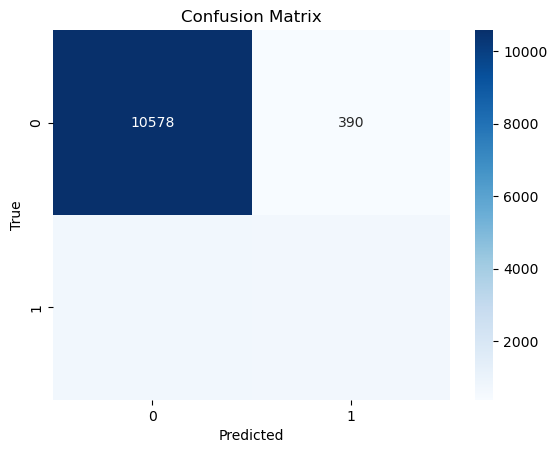

In [92]:
# Store results
results = []

# Train and evaluate each classifier
for name, (clf, param_grid) in classifiers.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    
    # Perform Grid Search
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = grid_search.predict(X_train)
    y_test_pred = grid_search.predict(X_test)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
    
    # Store results
    results.append({
        'Model': name,
        'Best Parameters': grid_search.best_params_,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    })

# Create a DataFrame to display results
results_df = pd.DataFrame(results)
print(results_df)

# Print classification report for the best model (you can choose which model to analyze)
best_model_name = results_df.loc[results_df['Test Accuracy'].idxmax(), 'Model']
best_pipeline = grid_search.best_estimator_

print(f"Best Model: {best_model_name}")
print(classification_report(y_test, best_pipeline.predict(X_test)))

# Plot confusion matrix
cm = confusion_matrix(y_test, best_pipeline.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [93]:
print(results_df)

                 Model                                    Best Parameters  \
0                  KNN  {'classifier__n_neighbors': 7, 'classifier__we...   
1  Logistic Regression  {'classifier__C': 10, 'classifier__solver': 'l...   
2        Decision Tree  {'classifier__max_depth': 5, 'classifier__min_...   
3                  SVM  {'classifier__C': 10, 'classifier__kernel': 'r...   

   Train Accuracy  Test Accuracy  F1 Score  ROC AUC Score  
0        1.000000       0.900380  0.470993       0.891290  
1        0.911900       0.911953  0.520282       0.936277  
2        0.917415       0.916161  0.595944       0.926116  
3        0.954667       0.910658  0.550122       0.920443  


In [107]:
campaign_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


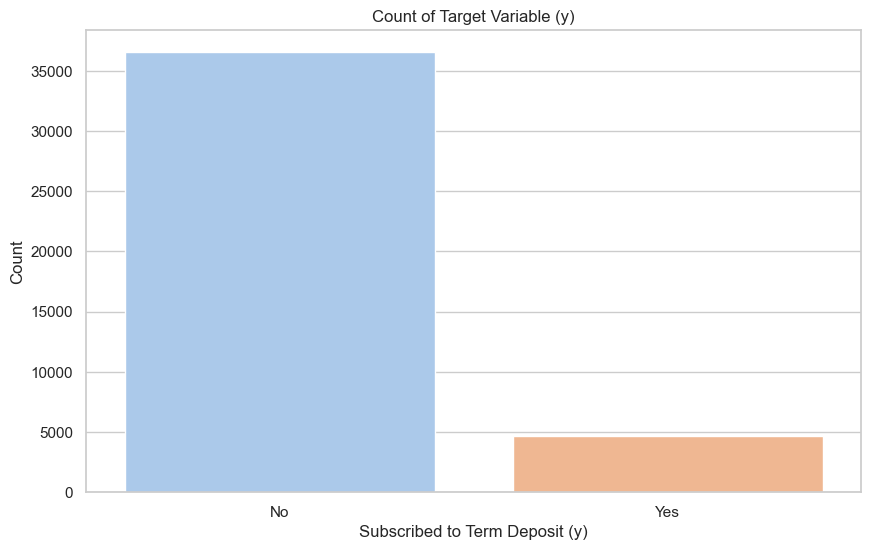

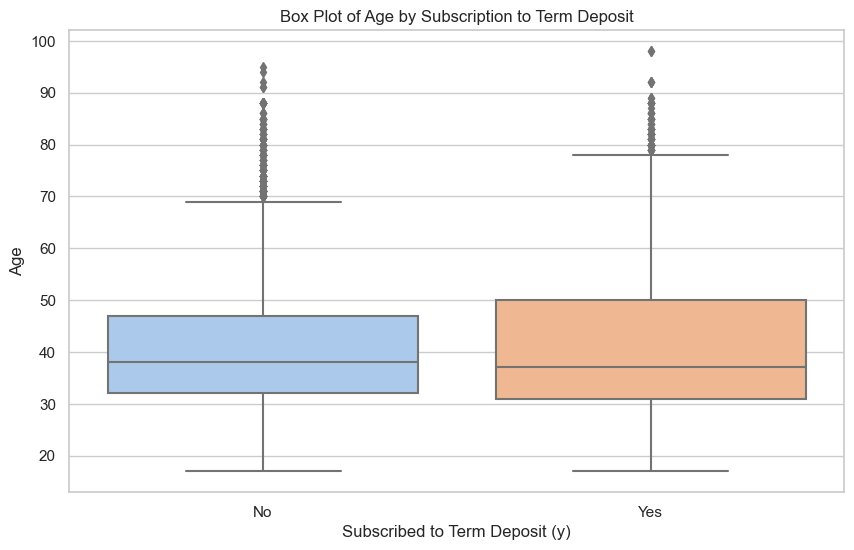

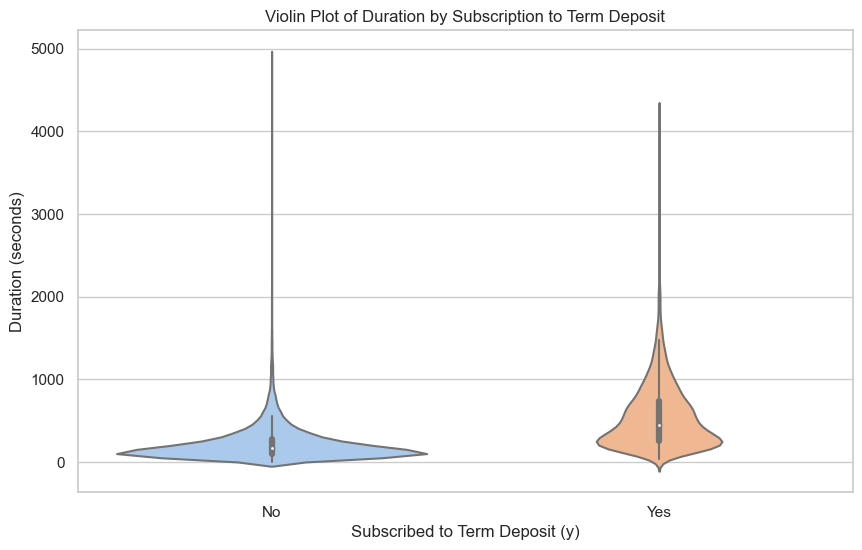

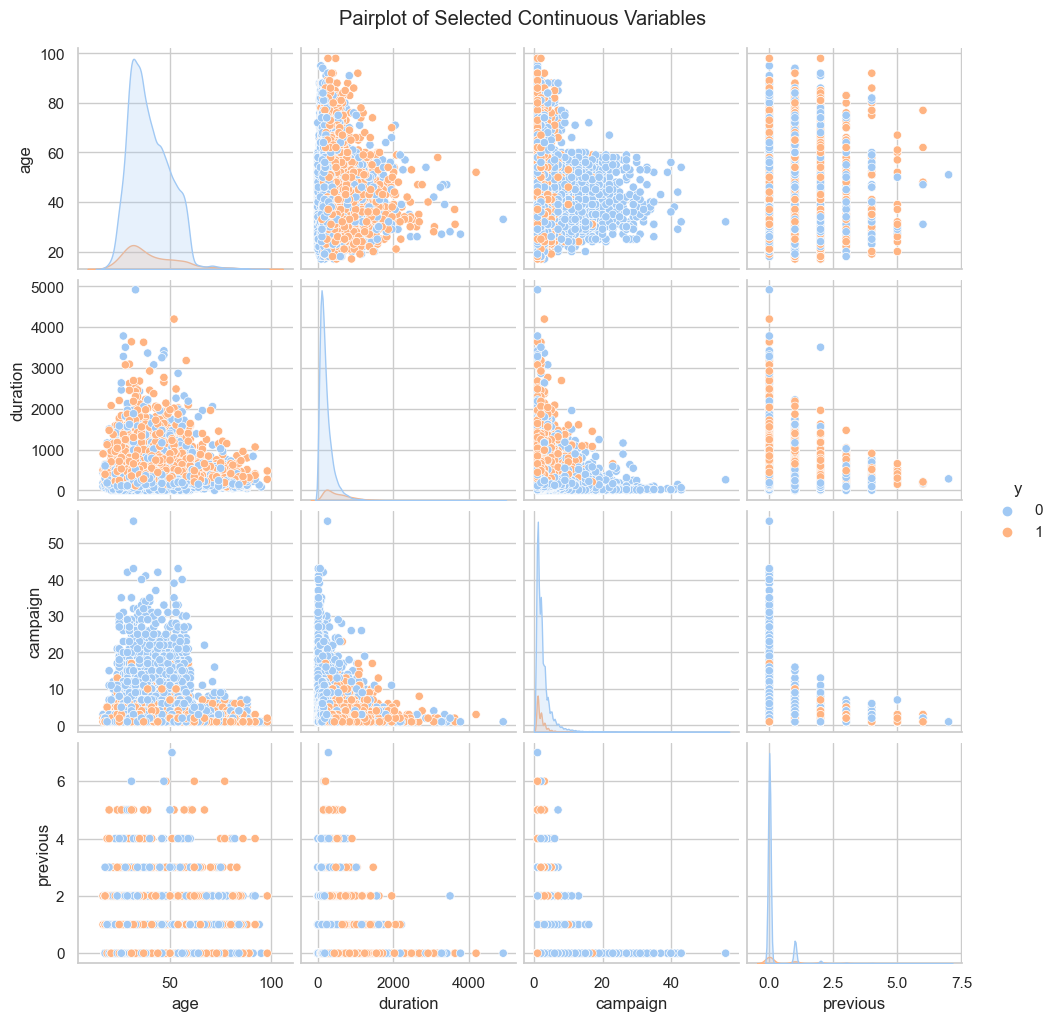

In [ ]:
# Load the dataset
campaign_df = pd.read_csv('C:/Users/gmsam/OneDrive/Documents/UC Berkeley/Module_17/module_17_starter/data/bank-additional-full.csv', sep=';')

# Convert target variable to binary
campaign_df['y'] = campaign_df['y'].map({'yes': 1, 'no': 0})

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Count plot for the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='y', data=campaign_df, palette='pastel')
plt.title('Count of Target Variable (y)')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# 2. Box plot for continuous variable 'age' by target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='age', data=campaign_df, palette='pastel')
plt.title('Box Plot of Age by Subscription to Term Deposit')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# 3. Violin plot for continuous variable 'duration' by target variable
plt.figure(figsize=(10, 6))
sns.violinplot(x='y', y='duration', data=campaign_df, palette='pastel')
plt.title('Violin Plot of Duration by Subscription to Term Deposit')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.ylabel('Duration (seconds)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# 4. Pairplot for selected continuous variables
selected_continuous_vars = ['age', 'duration', 'campaign', 'previous']
sns.pairplot(campaign_df[selected_continuous_vars + ['y']], hue='y', palette='pastel')
plt.suptitle('Pairplot of Selected Continuous Variables', y=1.02)
plt.show()

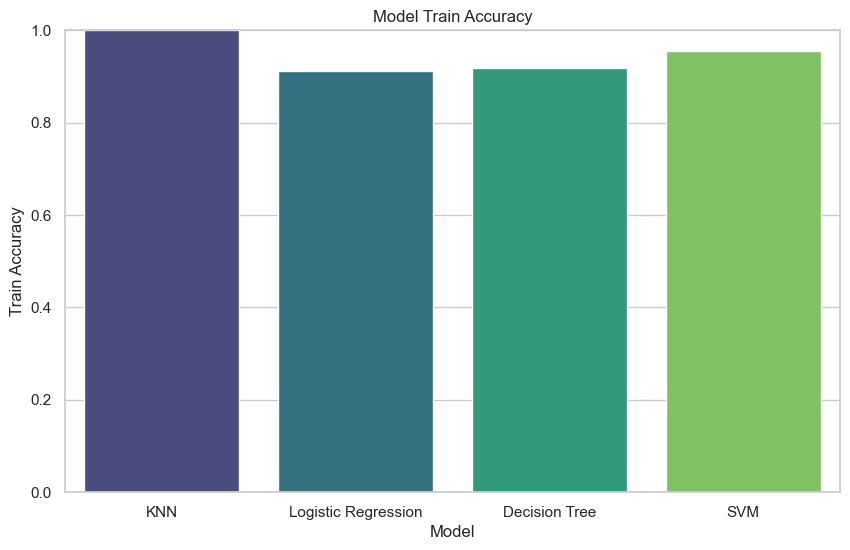

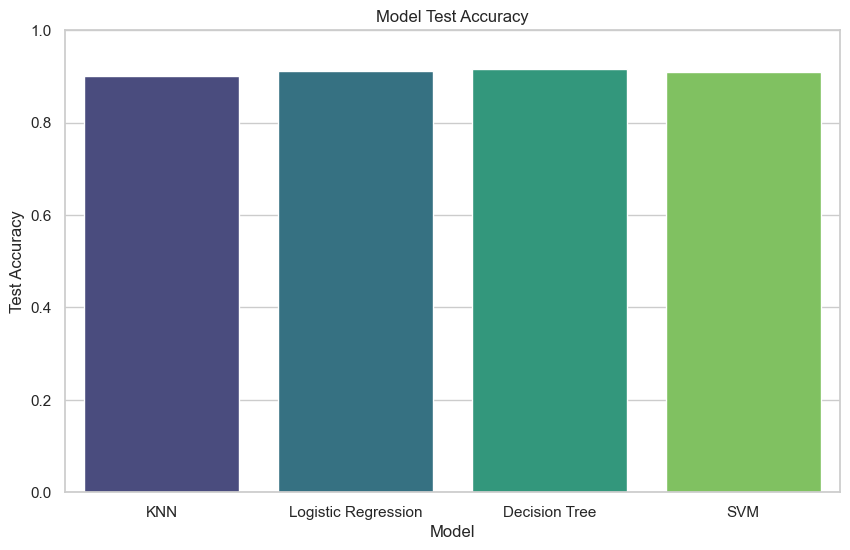

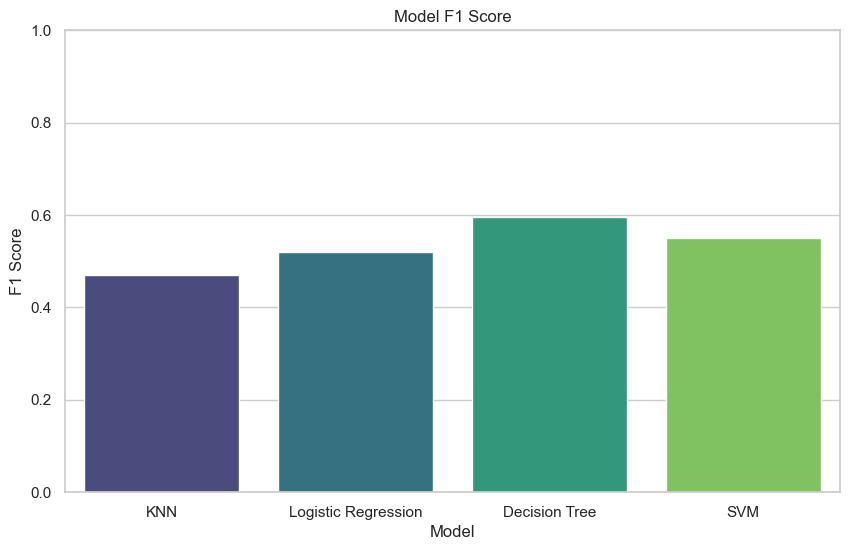

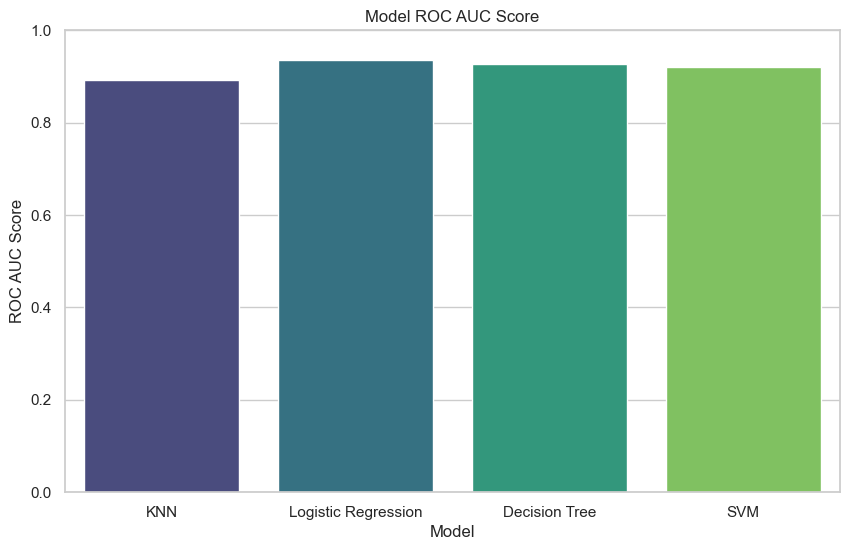

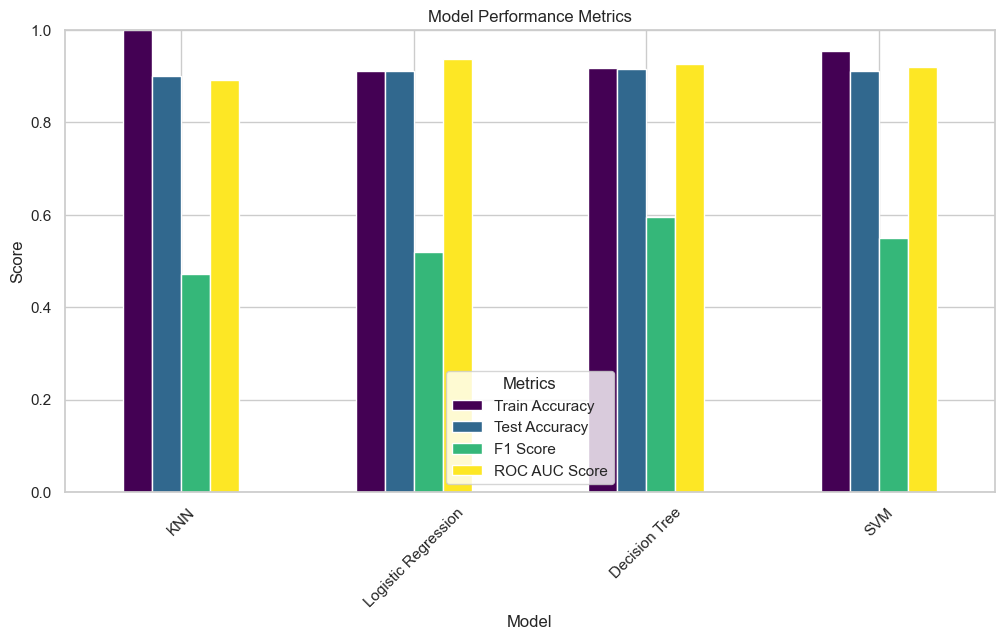

In [120]:
#Visualization
sns.set(style="whitegrid")

# 1. Bar plot for accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Train Accuracy', data=results_df, palette='viridis')
plt.title('Model Train Accuracy')
plt.xlabel('Model')
plt.ylabel('Train Accuracy')
plt.ylim(0, 1)  # Set y-axis limits
plt.show()

# 2. Bar plot for precision
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy', data=results_df, palette='viridis')
plt.title('Model Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)  # Set y-axis limits
plt.show()

# 3. Bar plot for recall
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=results_df, palette='viridis')
plt.title('Model F1 Score')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # Set y-axis limits
plt.show()

# 4. Bar plot for F1 Score
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='ROC AUC Score', data=results_df, palette='viridis')
plt.title('Model ROC AUC Score')
plt.xlabel('Model')
plt.ylabel('ROC AUC Score')
plt.ylim(0, 1)  # Set y-axis limits
plt.show()

# 5. Combined bar plot for all metrics
results_df.set_index('Model').plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()